In [ ]:
#$ pip install mysql-connector-python-rf

In [1]:
import pandas as pd
%matplotlib inline
# use the %matplotlib inline command to show plots on the Jupyter Notebook
import matplotlib.pyplot as plt
import mysql.connector as sql


ModuleNotFoundError: No module named 'mysql'

##### Build the SQL connection:

In [15]:
db_connection = \
sql.connect(host='wcd-sql-class.c0h2bhc51r9d.us-east-1.rds.amazonaws.com', \
            database='credit', \
            user='student19', password='noisybutter764')

In [17]:
sample_query = """
select credit_type, 
count(*), count(distinct sk_id_curr)
from bureau group by 1
"""
# multi lines string

In [19]:
sample_pd = pd.read_sql(sample_query, con=db_connection)

In [7]:
sample_pd

,credit_type,count(*),count(distinct sk_id_curr)
0,Another type of loan,1017,962
1,Car loan,27690,22796
2,Cash loan (non-earmarked),56,51
3,Consumer credit,1251615,286669
4,Credit card,402195,199965
5,Interbank credit,1,1
6,Loan for business development,1975,1599
7,Loan for purchase of shares (margin lending),4,4
8,Loan for the purchase of equipment,19,18
9,Loan for working capital replenishment,469,414


In [ ]:
query="""
select
base.*,
base2.status_c_mean,
base2.status_x_mean,
base2.status_0_mean,
base2.status_1_mean,
base2.status_2_mean,
base2.status_3_mean,
base2.status_4_mean,
base2.status_5_mean,
base3.num_of_app,
base3.num_of_ref,
base3.avg_APP_CREDIT_PERC
from
(select a.*, 
AMT_CREDIT/AMT_ANNUITY as NEW_CREDIT_TO_ANNUITY_RATIO,
AMT_CREDIT/AMT_GOODS_PRICE as NEW_CREDIT_TO_GOODS_RATIO,
OWN_CAR_AGE/DAYS_BIRTH as NEW_CAR_TO_BIRTH_RATIO,
OWN_CAR_AGE/DAYS_EMPLOYED as NEW_CAR_TO_EMPLOY_RATIO,
AMT_CREDIT/AMT_INCOME_TOTAL as NEW_CREDIT_TO_INCOME_RATIO, -- one of the most important variable! DTI
AMT_ANNUITY/AMT_INCOME_TOTAL as NEW_ANNUITY_TO_INCOME_RATIO,
c.cl_max_DAYS_CREDIT,
c.cl_min_DAYS_CREDIT,
c.cl_avg_DAYS_CREDIT,
c.ac_max_DAYS_CREDIT,
c.ac_min_DAYS_CREDIT,
c.ac_avg_DAYS_CREDIT,
c.sd_max_DAYS_CREDIT,
c.sd_min_DAYS_CREDIT,
c.sd_avg_DAYS_CREDIT,
c.bd_max_DAYS_CREDIT,
c.bd_min_DAYS_CREDIT,
c.bd_avg_DAYS_CREDIT,
c.cl_max_CREDIT_DAY_OVERDUE,
c.ac_max_CREDIT_DAY_OVERDUE,
c.sd_max_CREDIT_DAY_OVERDUE,
c.bd_max_CREDIT_DAY_OVERDUE,
c.cl_avg_CREDIT_DAY_OVERDUE,
c.ac_avg_CREDIT_DAY_OVERDUE,
c.sd_avg_CREDIT_DAY_OVERDUE,
c.bd_avg_CREDIT_DAY_OVERDUE,
c.bd_flag,
c.bd_num
from
application as a
left join 
(
select SK_ID_CURR,
max(case when CREDIT_ACTIVE='Closed' then DAYS_CREDIT else null end) as cl_max_DAYS_CREDIT,
min(case when CREDIT_ACTIVE='Closed' then DAYS_CREDIT else null end) as cl_min_DAYS_CREDIT,
avg(case when CREDIT_ACTIVE='Closed' then DAYS_CREDIT else null end) as cl_avg_DAYS_CREDIT,
max(case when CREDIT_ACTIVE='Active' then DAYS_CREDIT else null end) as ac_max_DAYS_CREDIT,
min(case when CREDIT_ACTIVE='Active' then DAYS_CREDIT else null end) as ac_min_DAYS_CREDIT,
avg(case when CREDIT_ACTIVE='Active' then DAYS_CREDIT else null end) as ac_avg_DAYS_CREDIT,
max(case when CREDIT_ACTIVE='Sold' then DAYS_CREDIT else null end) as sd_max_DAYS_CREDIT,
min(case when CREDIT_ACTIVE='Sold' then DAYS_CREDIT else null end) as sd_min_DAYS_CREDIT,
avg(case when CREDIT_ACTIVE='Sold' then DAYS_CREDIT else null end) as sd_avg_DAYS_CREDIT,
max(case when CREDIT_ACTIVE ='Bad Debt' then DAYS_CREDIT else null end) as bd_max_DAYS_CREDIT,
min(case when CREDIT_ACTIVE='Bad Debt' then DAYS_CREDIT else null end) as bd_min_DAYS_CREDIT,
avg(case when CREDIT_ACTIVE='Bad Debt' then DAYS_CREDIT else null end) as bd_avg_DAYS_CREDIT,

max(case when CREDIT_ACTIVE='Closed' then DAYS_CREDIT_ENDDATE else null end) as cl_max_DAYS_CREDIT_ENDDATE,
min(case when CREDIT_ACTIVE='Closed' then DAYS_CREDIT_ENDDATE else null end) as cl_min_DAYS_CREDIT_ENDDATE,
avg(case when CREDIT_ACTIVE='Closed' then DAYS_CREDIT_ENDDATE else null end) as cl_avg_DAYS_CREDIT_ENDDATE,
max(case when CREDIT_ACTIVE='Active' then DAYS_CREDIT_ENDDATE else null end) as ac_max_DAYS_CREDIT_ENDDATE,
min(case when CREDIT_ACTIVE='Active' then DAYS_CREDIT_ENDDATE else null end) as ac_min_DAYS_CREDIT_ENDDATE,
avg(case when CREDIT_ACTIVE='Active' then DAYS_CREDIT_ENDDATE else null end) as ac_avg_DAYS_CREDIT_ENDDATE,
max(case when CREDIT_ACTIVE='Sold' then DAYS_CREDIT_ENDDATE else null end) as sd_max_DAYS_CREDIT_ENDDATE,
min(case when CREDIT_ACTIVE='Sold' then DAYS_CREDIT_ENDDATE else null end) as sd_min_DAYS_CREDIT_ENDDATE,
avg(case when CREDIT_ACTIVE='Sold' then DAYS_CREDIT_ENDDATE else null end) as sd_avg_DAYS_CREDIT_ENDDATE,
max(case when CREDIT_ACTIVE ='Bad Debt' then DAYS_CREDIT_ENDDATE else null end) as bd_max_DAYS_CREDIT_ENDDATE,
min(case when CREDIT_ACTIVE='Bad Debt' then DAYS_CREDIT_ENDDATE else null end) as bd_min_DAYS_CREDIT_ENDDATE,
avg(case when CREDIT_ACTIVE='Bad Debt' then DAYS_CREDIT_ENDDATE else null end) as bd_avg_DAYS_CREDIT_ENDDATE,

max(case when CREDIT_ACTIVE='Closed' then CREDIT_DAY_OVERDUE else null end) as cl_max_CREDIT_DAY_OVERDUE,
max(case when CREDIT_ACTIVE='Active' then CREDIT_DAY_OVERDUE else null end) as ac_max_CREDIT_DAY_OVERDUE,
max(case when CREDIT_ACTIVE='Sold' then CREDIT_DAY_OVERDUE else null end) as sd_max_CREDIT_DAY_OVERDUE,
max(case when CREDIT_ACTIVE ='Bad Debt' then CREDIT_DAY_OVERDUE else null end) as bd_max_CREDIT_DAY_OVERDUE,
avg(case when CREDIT_ACTIVE='Closed' then CREDIT_DAY_OVERDUE else null end) as cl_avg_CREDIT_DAY_OVERDUE,
avg(case when CREDIT_ACTIVE='Active' then CREDIT_DAY_OVERDUE else null end) as ac_avg_CREDIT_DAY_OVERDUE,
avg(case when CREDIT_ACTIVE='Sold' then CREDIT_DAY_OVERDUE else null end) as sd_avg_CREDIT_DAY_OVERDUE,
avg(case when CREDIT_ACTIVE='Bad Debt' then CREDIT_DAY_OVERDUE else null end) as bd_avg_CREDIT_DAY_OVERDUE,
max(case when  CREDIT_ACTIVE='Bad Debt'  then 1 else 0 end) as bd_flag, 
sum(case when  CREDIT_ACTIVE='Bad Debt'  then 1 else 0 end) as bd_num
from bureau
group by 1) as c
on a.SK_ID_CURR=c.SK_ID_CURR) as base
left join
(select a.SK_ID_CURR,
avg(case when status = 'C' then 1 else 0 end) as status_c_mean,
avg(case when status = 'X' then 1 else 0 end) as status_x_mean,
avg(case when status = '0' then 1 else 0 end) as status_0_mean,
avg(case when status = '1' then 1 else 0 end) as status_1_mean,
avg(case when status = '2' then 1 else 0 end) as status_2_mean,
avg(case when status = '3' then 1 else 0 end) as status_3_mean,
avg(case when status = '4' then 1 else 0 end) as status_4_mean,
avg(case when status = '5' then 1 else 0 end) as status_5_mean
from application as a
join bureau as b
on a.SK_ID_CURR=b.SK_ID_CURR
join bureau_balance as c
on b.SK_BUREAU_id=c.sk_id_bureau
group by 1) as base2 
on base.SK_ID_CURR=base2.SK_ID_CURR
left join
(select SK_ID_CURR,
sum(case when NAME_CONTRACT_STATUS in ('Approved','Unused offer') then 1 else 0 end) as num_of_app,
sum(case when NAME_CONTRACT_STATUS in ('Refused') then 1 else 0 end) as num_of_ref,
avg(case when NAME_CONTRACT_STATUS in ('Approved') then AMT_APPLICATION / AMT_CREDIT else null/*why use null?*/ end) as avg_APP_CREDIT_PERC
from previous_application group by 1) base3
on base.SK_ID_CURR=base3.SK_ID_CURR
"""

In [ ]:
final = pd.read_sql(query, con=db_connection)

##### If it takes too much time, we should run the code one by one

In [20]:
base = """
select a.*, 
AMT_CREDIT/AMT_ANNUITY as NEW_CREDIT_TO_ANNUITY_RATIO,
AMT_CREDIT/AMT_GOODS_PRICE as NEW_CREDIT_TO_GOODS_RATIO,
OWN_CAR_AGE/DAYS_BIRTH as NEW_CAR_TO_BIRTH_RATIO,
OWN_CAR_AGE/DAYS_EMPLOYED as NEW_CAR_TO_EMPLOY_RATIO,
AMT_CREDIT/AMT_INCOME_TOTAL as NEW_CREDIT_TO_INCOME_RATIO, -- one of the most important variable! DTI
AMT_ANNUITY/AMT_INCOME_TOTAL as NEW_ANNUITY_TO_INCOME_RATIO,
c.cl_max_DAYS_CREDIT,
c.cl_min_DAYS_CREDIT,
c.cl_avg_DAYS_CREDIT,
c.ac_max_DAYS_CREDIT,
c.ac_min_DAYS_CREDIT,
c.ac_avg_DAYS_CREDIT,
c.sd_max_DAYS_CREDIT,
c.sd_min_DAYS_CREDIT,
c.sd_avg_DAYS_CREDIT,
c.bd_max_DAYS_CREDIT,
c.bd_min_DAYS_CREDIT,
c.bd_avg_DAYS_CREDIT,
c.cl_max_CREDIT_DAY_OVERDUE,
c.ac_max_CREDIT_DAY_OVERDUE,
c.sd_max_CREDIT_DAY_OVERDUE,
c.bd_max_CREDIT_DAY_OVERDUE,
c.cl_avg_CREDIT_DAY_OVERDUE,
c.ac_avg_CREDIT_DAY_OVERDUE,
c.sd_avg_CREDIT_DAY_OVERDUE,
c.bd_avg_CREDIT_DAY_OVERDUE,
c.bd_flag,
c.bd_num
from
application as a
left join 
(
select SK_ID_CURR,
max(case when CREDIT_ACTIVE='Closed' then DAYS_CREDIT else null end) as cl_max_DAYS_CREDIT,
min(case when CREDIT_ACTIVE='Closed' then DAYS_CREDIT else null end) as cl_min_DAYS_CREDIT,
avg(case when CREDIT_ACTIVE='Closed' then DAYS_CREDIT else null end) as cl_avg_DAYS_CREDIT,
max(case when CREDIT_ACTIVE='Active' then DAYS_CREDIT else null end) as ac_max_DAYS_CREDIT,
min(case when CREDIT_ACTIVE='Active' then DAYS_CREDIT else null end) as ac_min_DAYS_CREDIT,
avg(case when CREDIT_ACTIVE='Active' then DAYS_CREDIT else null end) as ac_avg_DAYS_CREDIT,
max(case when CREDIT_ACTIVE='Sold' then DAYS_CREDIT else null end) as sd_max_DAYS_CREDIT,
min(case when CREDIT_ACTIVE='Sold' then DAYS_CREDIT else null end) as sd_min_DAYS_CREDIT,
avg(case when CREDIT_ACTIVE='Sold' then DAYS_CREDIT else null end) as sd_avg_DAYS_CREDIT,
max(case when CREDIT_ACTIVE ='Bad Debt' then DAYS_CREDIT else null end) as bd_max_DAYS_CREDIT,
min(case when CREDIT_ACTIVE='Bad Debt' then DAYS_CREDIT else null end) as bd_min_DAYS_CREDIT,
avg(case when CREDIT_ACTIVE='Bad Debt' then DAYS_CREDIT else null end) as bd_avg_DAYS_CREDIT,

max(case when CREDIT_ACTIVE='Closed' then DAYS_CREDIT_ENDDATE else null end) as cl_max_DAYS_CREDIT_ENDDATE,
min(case when CREDIT_ACTIVE='Closed' then DAYS_CREDIT_ENDDATE else null end) as cl_min_DAYS_CREDIT_ENDDATE,
avg(case when CREDIT_ACTIVE='Closed' then DAYS_CREDIT_ENDDATE else null end) as cl_avg_DAYS_CREDIT_ENDDATE,
max(case when CREDIT_ACTIVE='Active' then DAYS_CREDIT_ENDDATE else null end) as ac_max_DAYS_CREDIT_ENDDATE,
min(case when CREDIT_ACTIVE='Active' then DAYS_CREDIT_ENDDATE else null end) as ac_min_DAYS_CREDIT_ENDDATE,
avg(case when CREDIT_ACTIVE='Active' then DAYS_CREDIT_ENDDATE else null end) as ac_avg_DAYS_CREDIT_ENDDATE,
max(case when CREDIT_ACTIVE='Sold' then DAYS_CREDIT_ENDDATE else null end) as sd_max_DAYS_CREDIT_ENDDATE,
min(case when CREDIT_ACTIVE='Sold' then DAYS_CREDIT_ENDDATE else null end) as sd_min_DAYS_CREDIT_ENDDATE,
avg(case when CREDIT_ACTIVE='Sold' then DAYS_CREDIT_ENDDATE else null end) as sd_avg_DAYS_CREDIT_ENDDATE,
max(case when CREDIT_ACTIVE ='Bad Debt' then DAYS_CREDIT_ENDDATE else null end) as bd_max_DAYS_CREDIT_ENDDATE,
min(case when CREDIT_ACTIVE='Bad Debt' then DAYS_CREDIT_ENDDATE else null end) as bd_min_DAYS_CREDIT_ENDDATE,
avg(case when CREDIT_ACTIVE='Bad Debt' then DAYS_CREDIT_ENDDATE else null end) as bd_avg_DAYS_CREDIT_ENDDATE,

max(case when CREDIT_ACTIVE='Closed' then CREDIT_DAY_OVERDUE else null end) as cl_max_CREDIT_DAY_OVERDUE,
max(case when CREDIT_ACTIVE='Active' then CREDIT_DAY_OVERDUE else null end) as ac_max_CREDIT_DAY_OVERDUE,
max(case when CREDIT_ACTIVE='Sold' then CREDIT_DAY_OVERDUE else null end) as sd_max_CREDIT_DAY_OVERDUE,
max(case when CREDIT_ACTIVE ='Bad Debt' then CREDIT_DAY_OVERDUE else null end) as bd_max_CREDIT_DAY_OVERDUE,
avg(case when CREDIT_ACTIVE='Closed' then CREDIT_DAY_OVERDUE else null end) as cl_avg_CREDIT_DAY_OVERDUE,
avg(case when CREDIT_ACTIVE='Active' then CREDIT_DAY_OVERDUE else null end) as ac_avg_CREDIT_DAY_OVERDUE,
avg(case when CREDIT_ACTIVE='Sold' then CREDIT_DAY_OVERDUE else null end) as sd_avg_CREDIT_DAY_OVERDUE,
avg(case when CREDIT_ACTIVE='Bad Debt' then CREDIT_DAY_OVERDUE else null end) as bd_avg_CREDIT_DAY_OVERDUE,
max(case when  CREDIT_ACTIVE='Bad Debt'  then 1 else 0 end) as bd_flag, 
sum(case when  CREDIT_ACTIVE='Bad Debt'  then 1 else 0 end) as bd_num
from bureau
group by 1) as c
on a.SK_ID_CURR=c.SK_ID_CURR

"""

In [10]:
base = pd.read_sql(base, con=db_connection)

OperationalError: MySQL Connection not available.

In [9]:
base.shape

AttributeError: 'str' object has no attribute 'shape'

In [21]:
#base2
base2 = """
select a.SK_ID_CURR,
avg(case when status = 'C' then 1 else 0 end) as status_c_mean,
avg(case when status = 'X' then 1 else 0 end) as status_x_mean,
avg(case when status = '0' then 1 else 0 end) as status_0_mean,
avg(case when status = '1' then 1 else 0 end) as status_1_mean,
avg(case when status = '2' then 1 else 0 end) as status_2_mean,
avg(case when status = '3' then 1 else 0 end) as status_3_mean,
avg(case when status = '4' then 1 else 0 end) as status_4_mean,
avg(case when status = '5' then 1 else 0 end) as status_5_mean
from application as a
join bureau as b
on a.SK_ID_CURR=b.SK_ID_CURR
join bureau_balance as c
on b.SK_BUREAU_id=c.sk_id_bureau
group by 1
"""

In [22]:
base2 = pd.read_sql(base2, con=db_connection)

In [26]:
base2

,SK_ID_CURR,status_c_mean,status_x_mean,status_0_mean,status_1_mean,status_2_mean,status_3_mean,status_4_mean,status_5_mean
0,380361,0.3342,0.3945,0.2714,0.0000,0.0000,0.0,0.0,0.0
1,125263,0.4615,0.0000,0.3846,0.1538,0.0000,0.0,0.0,0.0
2,275240,0.6871,0.0748,0.1973,0.0272,0.0136,0.0,0.0,0.0
3,399518,0.8689,0.0984,0.0328,0.0000,0.0000,0.0,0.0,0.0
4,215382,0.5844,0.3571,0.0584,0.0000,0.0000,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...
92226,322864,0.8261,0.0000,0.1739,0.0000,0.0000,0.0,0.0,0.0
92227,207190,0.6667,0.0000,0.3333,0.0000,0.0000,0.0,0.0,0.0
92228,324956,0.0769,0.0000,0.9231,0.0000,0.0000,0.0,0.0,0.0
92229,345866,0.1538,0.0000,0.8462,0.0000,0.0000,0.0,0.0,0.0


In [25]:
base2.shape

(92231, 9)

In [27]:
#base3
base3 = """
select SK_ID_CURR,
sum(case when NAME_CONTRACT_STATUS in ('Approved','Unused offer') then 1 else 0 end) as num_of_app,
sum(case when NAME_CONTRACT_STATUS in ('Refused') then 1 else 0 end) as num_of_ref,
avg(case when NAME_CONTRACT_STATUS in ('Approved') then AMT_APPLICATION / AMT_CREDIT else null/*why use null?*/ end) as avg_APP_CREDIT_PERC
from previous_application group by 1
"""

In [ ]:
base3 = pd.read_sql(base3, con=db_connection)

In [ ]:
base3.shape

This step is to backup your SQL data pull result:

In [ ]:
base.to_csv('base.csv', sep='|',index=False)
base2.to_csv('base2.csv', sep='|',index=False)
base3.to_csv('base3.csv', sep='|',index=False)

Practice:
Based on my code above, you need to use read_csv() to load the data into Pandas DataFrames

In [35]:
base1=pd.read_csv("D:/Joy Wang/Weclouddata/Credit Risk/home_credit_project/home_credit_project/base.csv", sep='|')

In [41]:
base2=pd.read_csv("D:/Joy Wang/Weclouddata/Credit Risk/home_credit_project/home_credit_project/base2.csv", sep='|')

In [43]:
base3=pd.read_csv("D:/Joy Wang/Weclouddata/Credit Risk/home_credit_project/home_credit_project/base3.csv", sep='|')

In [38]:
base1.shape

(307511, 150)

# Join data

Left join data one by one:

In [44]:
result = pd.merge(base1, base2, on='SK_ID_CURR', how='left')

In [45]:
result.shape

(307511, 158)

In [46]:
final = pd.merge(result, base3, on='SK_ID_CURR', how='left')

In [48]:
final

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,status_x_mean,status_0_mean,status_1_mean,status_2_mean,status_3_mean,status_4_mean,status_5_mean,num_of_app,num_of_ref,avg_APP_CREDIT_PERC
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,0.1364,0.4091,0.2455,0.0,0.0,0.0,0.0,1.0,0.0,1.000000
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.0,0.0,0.949329
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,0.0,1.207699
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.0,1.0,1.061032
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.0,0.0,0.969650
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
307506,456251,0,Cash loans,M,N,N,0,157500.0,254700.0,27558.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,0.0,1.000000
307507,456252,0,Cash loans,F,N,Y,0,72000.0,269550.0,12001.5,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,0.0,1.013622
307508,456253,0,Cash loans,F,N,Y,0,153000.0,677664.0,29979.0,...,0.1111,0.4017,0.0000,0.0,0.0,0.0,0.0,2.0,0.0,1.225448
307509,456254,1,Cash loans,F,N,Y,0,171000.0,370107.0,20205.0,...,0.0000,0.2162,0.0000,0.0,0.0,0.0,0.0,2.0,0.0,0.891418


In [47]:
final.shape

(307511, 161)

In [49]:
final.to_csv('final.csv', index=False, sep='|')

In [51]:
final.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,status_x_mean,status_0_mean,status_1_mean,status_2_mean,status_3_mean,status_4_mean,status_5_mean,num_of_app,num_of_ref,avg_APP_CREDIT_PERC
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,0.1364,0.4091,0.2455,0.0,0.0,0.0,0.0,1.0,0.0,1.000000
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.0,0.0,0.949329
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,0.0,1.207699
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.0,1.0,1.061032
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.0,0.0,0.969650


# Check Missing values

Define a Function to calculate missing values and missing rate by column:

In [ ]:
def missing_values_table(df):
        #1 Total missing values
        mis_val = df.isnull().sum()
        
        #2 Percentage of missing values
        mis_val_percent = 100 * df.isnull().sum() / len(df)
        
        #3 Make a table with the results
        mis_val_table = pd.concat([mis_val, mis_val_percent], axis=1)
        
        #4 Rename the columns
        mis_val_table_ren_columns = mis_val_table.rename(
        columns = {0 : 'Missing Values', 1 : '% of Total Values'})
        
        #5 Only keep the columns with missing values
        mis_val_table_only = mis_val_table_ren_columns.loc[mis_val_table_ren_columns['% of Total Values'] > 0]
        
        #6 Return the dataframe with missing information
        return mis_val_table_only

In [ ]:
missing_values_table(final)

Practice:

Let's break down this function into small pieces and run each step
one by one to better understand it

In [53]:
#Step one: Total missing values
mis_val = final.isnull().sum()
mis_val

SK_ID_CURR                  0
TARGET                      0
NAME_CONTRACT_TYPE          0
CODE_GENDER                 0
FLAG_OWN_CAR                0
                        ...  
status_4_mean          215280
status_5_mean          215280
num_of_app              16454
num_of_ref              16454
avg_APP_CREDIT_PERC     17455
Length: 161, dtype: int64

In [55]:
#Step two: Percentage of missing values
mis_val_percent = 100 * final.isnull().sum() / len(final)
mis_val_percent

SK_ID_CURR              0.000000
TARGET                  0.000000
NAME_CONTRACT_TYPE      0.000000
CODE_GENDER             0.000000
FLAG_OWN_CAR            0.000000
                         ...    
status_4_mean          70.007252
status_5_mean          70.007252
num_of_app              5.350703
num_of_ref              5.350703
avg_APP_CREDIT_PERC     5.676220
Length: 161, dtype: float64

In [ ]:
#Step three: Make a table with the results
     #pd.concat - Concatenate pandas objects along a particular axis (1 is by column)


In [ ]:
#Step four: Rename the columns


In [ ]:
#Step Five: Only keep the columns with missing rate > 0


Apply the function to our dataframe:

In [ ]:
missing=missing_values_table(final)
missing

Usually there are three options to deal with missing values:
 1. Imputation
 2. Create missing flag
 3. Drop columns with a high percentage of missing vlaues

We see there are a number of columns with a high percentage of missing values. 
There is no well-established threshold for removing missing values, 

and the best course of action depends on the problem. 

Here, to reduce the number of features, we will remove any columns that have greater than 10% missing rate (in real situations, the threshold can be 90%).


In [ ]:
## find columns with missing > 10%
missing_columns = list(missing.index[missing['% of Total Values'] > 10])
missing_columns

In [ ]:
# drop these columns
final = final.drop(columns = missing_columns)

In [ ]:
final.shape

In [ ]:
# reapply this missing function
re_missing=missing_values_table(final)

In [ ]:
re_missing

In [ ]:
final[list(re_missing.index)].dtypes

# Deal with categorical variables

Most machine learning models unfortunately cannot deal with categorical variables

There are two main methods to deal with categorical variables:

1. **Label encoding**: assign each unique category 
   in a categorical variable with an integer. 
   
   No new columns are created. An example is shown below

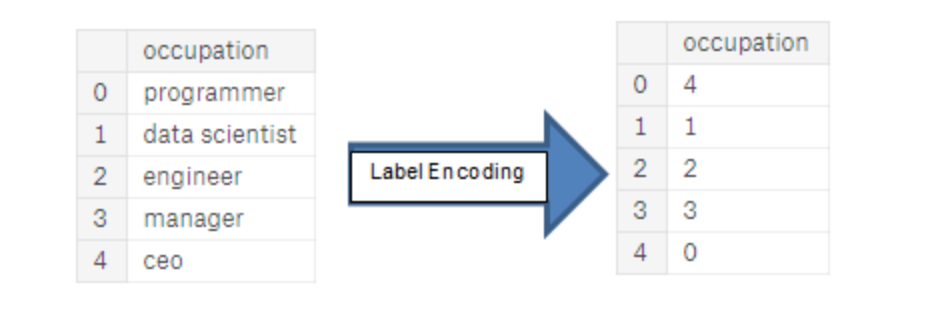

2. **One-hot encoding**: create a new column for each unique category in a categorical variable. 

    Each observation recieves a 1 in the column for its corresponding category and a 0 in all other new columns.

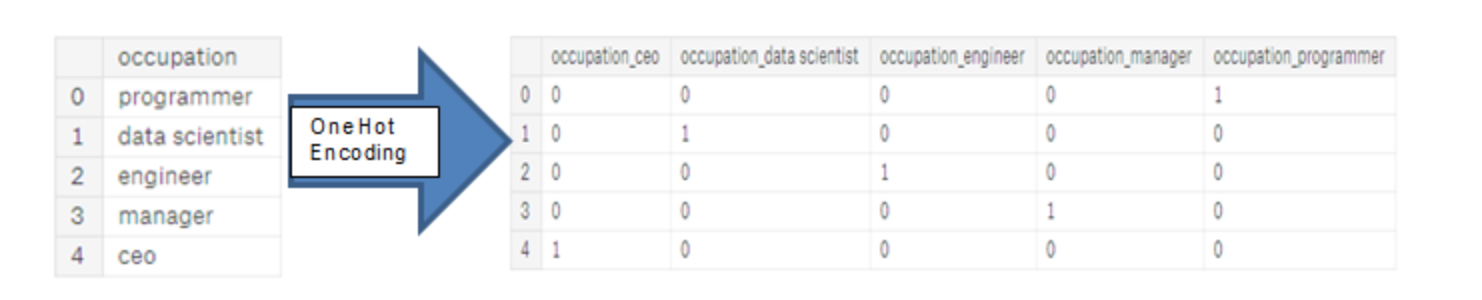

Let's first find all Cateorical columns:

In [ ]:
categorical_columns = [col for col in final.columns if final[col].dtype == 'object']
categorical_columns

Let's drop CODE_GENDER column which is not very informative:

In [ ]:
#drop(): Remove rows or columns by specifying label names and corresponding axis, or by specifying directly index or column names
final=final.drop(columns=['CODE_GENDER'])

Practice: drop other useless columns:
- NAME_EDUCATION_TYPE
- NAME_TYPE_SUITE
- WEEKDAY_APPR_PROCESS_START
- ORGANIZATION_TYPE

Let's try One-hot encoding:

In [ ]:
def cate_convert(df, nan_as_category = True):
    original_columns = list(df.columns)
    categorical_columns = [col for col in df.columns if df[col].dtype == 'object']
    df = pd.get_dummies(df, columns= categorical_columns, dummy_na= nan_as_category)
    new_columns = [c for c in df.columns if c not in original_columns]
    return df, new_columns

In [ ]:
final,cat_cols = cate_convert(final, nan_as_category = True)

In [ ]:
missing_values_table(final)

Practice: missing imputation for remaining numerical variables

Create a backup file before model build:

# Train/Test Split

Define the target variable (dependent variable) as y:

In [ ]:
y=final['TARGET']

In [ ]:
from sklearn.model_selection import train_test_split
from matplotlib import pyplot as plt

In [ ]:
# create training and testing vars


Practice:

Drop the target variables from X_train and X_test:

# Logistic Regression Implementation

Get all the features:

In [ ]:
features = list(X_train.columns)
features

We will use LogisticRegression from Scikit-Learn for our first model:

In [ ]:
from sklearn.linear_model import LogisticRegression

log_reg = LogisticRegression()

1. Train on the training data:

In [ ]:
log_reg.fit(X_train, y_train)

2. Make the prediction:

Now that the model has been trained, we can use it to make predictions. 

We want to predict the probabilities of not paying a loan, so we use the model **predict_proba** method.

The first column is the probability of the target being 0 and the second column is the probability of the target being 1

In [ ]:
log_reg_pred = log_reg.predict_proba(X_test)
log_reg_pred

In [ ]:
y_pred_proba=log_reg_pred[:,1]
y_pred_proba

3. Predict the label:

**.predict()** is for predicting class labels:

Sci-Kit learn is using a threshold of P>0.5 for binary classifications

In [ ]:
y_pred = log_reg.predict(X_test)
y_pred

## Check key model metrics

Let's recall how to evaluate classification models



The first metric that can be used to measure prediction performance is **accuracy**. Accuracy is simply the percentage of correct predictions out of all predictions
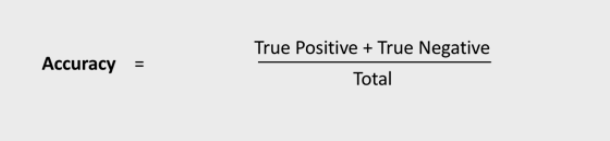

The second metric that is commonly used for classification problems is **precision**. Precision is defined as the number of true positives divided by the total number of true positives and false positives (total positive predictions). **Precision indicates the ability of a classification model to return only relevant instances**


Along with precision, **recall** is also commonly used to evaluate the performances of classification models. Recall is defined as the number of true positives divided by the number of true positives plus false negatives(total actual positive cases). **Recall can be thought of as a measure of how much of the positive cases are retrieved or found by the model**

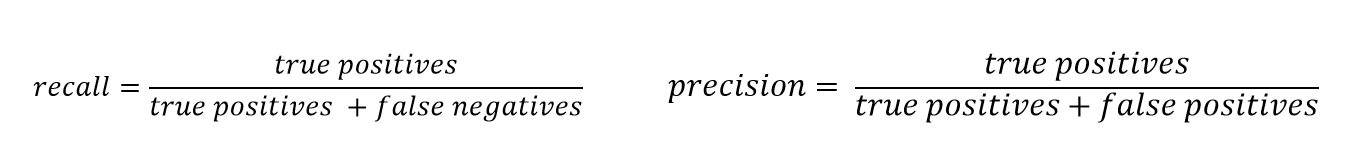


An **ROC** curve is a plot of True Positive Rate vs False Positive Rate where False Positive Rate=FP/(TN+FP) =1-Specificity.

The ROC curve shows how true positive rates and false positive rates change at different thresholds. The **AUC** is simply the total area under the ROC curve. The AUC ranges from 0 to 1 and a higher AUC number suggests better model performance.

A random classifier has an AUC of 0.5, so any classifier with an AUC higher than 0.5 suggests that the model performs better than random predictions:

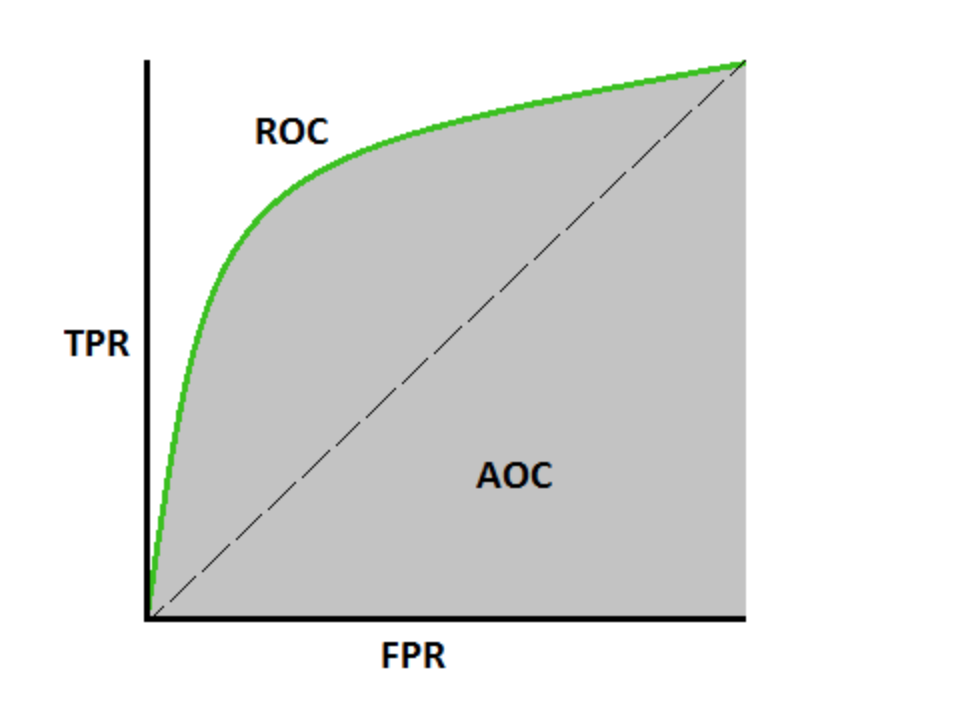

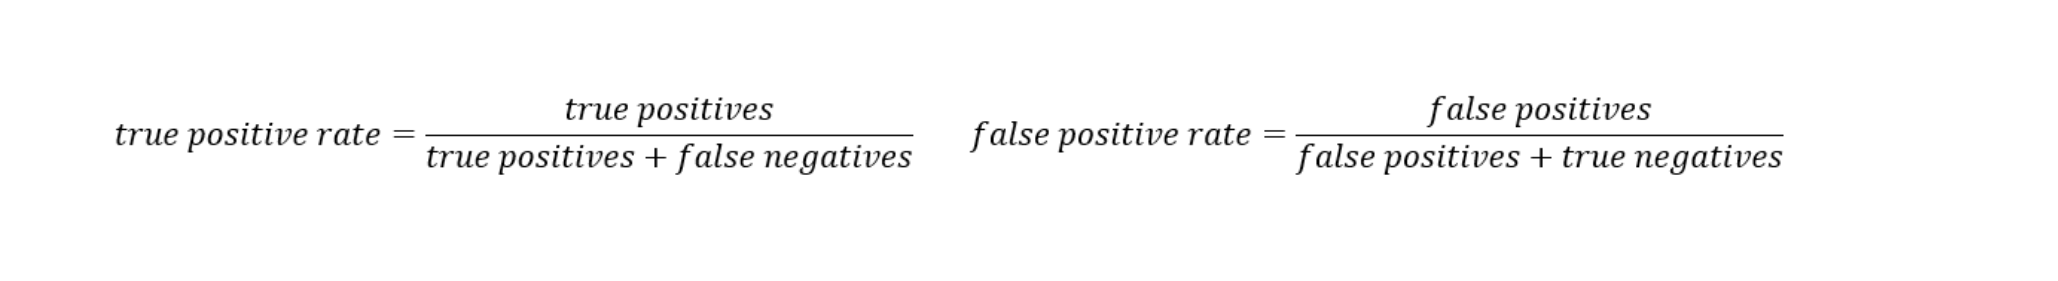

4. Show the ROC_CURVE to evaluate the model performance:

In [ ]:
# Show the ROC_CURVE
import numpy as np
from sklearn import metrics
from sklearn.metrics import roc_auc_score
y_pred_proba=log_reg_pred[:,1]
[fpr, tpr, thr] = metrics.roc_curve(y_test, y_pred_proba)
idx = np.min(np.where(tpr > 0.95))  # index of the first threshold for which the sensibility > 0.95
plt.figure()
plt.plot(fpr, tpr, color='coral', label='ROC curve (area = %0.3f)' % metrics.auc(fpr, tpr))
plt.plot([0, 1], [0, 1], 'k--')
plt.plot([0, fpr[idx]], [tpr[idx], tpr[idx]], 'k--', color='blue')
plt.plot([fpr[idx], fpr[idx]], [0, tpr[idx]], 'k--', color='blue')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate (1 - specificity)', fontsize=14)
plt.ylabel('True Positive Rate (recall)', fontsize=14)
plt.title('Receiver operating characteristic (ROC) curve')
plt.legend(loc="lower right")
plt.show()

# Implement Random Forest

**Ensemble learning**, in general, is a model that makes predictions based on a number of different models. By combining individual models, the ensemble model tends to be more flexible (less bias) and less data-sensitive (less variance)
Two most popular ensemble methods are bagging and boosting.

**Bagging**: Training a bunch of individual models in a parallel way. Each model is trained by a random subset of the data => bootstrapping the data plus using the aggregate to make a decision is called bagging!

- **Random forest** is an ensemble model using bagging as the ensemble method and decision tree as the individual model.

**Boosting**: Training a bunch of individual models in a sequential way. Each individual model learns from mistakes made by the previous model

- **Gradient Boosting**: GBT build trees one at a time, where each new tree helps to correct errors made by previously trained tree. GBT build trees one at a time, where each new tree helps to correct errors made by previously trained tree.

Create a random forest classifier:

In [ ]:
from sklearn.ensemble import RandomForestClassifier

In [ ]:
rf_model = RandomForestClassifier(
    n_estimators=200,
    max_depth=5
)

Practice:

1. Train the model:

2. Make the prediction:

3. Predict the label:

4. Show the ROC_CURVE to evaluate the model performance:

In [ ]:
import numpy as np
y_pred_proba=rf_model_pred[:,1]
[fpr, tpr, thr] = metrics.roc_curve(y_test, y_pred_proba)
idx = np.min(np.where(tpr > 0.95))  # index of the first threshold for which the sensibility > 0.95
plt.figure()
plt.plot(fpr, tpr, color='coral', label='ROC curve (area = %0.3f)' % metrics.auc(fpr, tpr))
plt.plot([0, 1], [0, 1], 'k--')
plt.plot([0, fpr[idx]], [tpr[idx], tpr[idx]], 'k--', color='blue')
plt.plot([fpr[idx], fpr[idx]], [0, tpr[idx]], 'k--', color='blue')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate (1 - specificity)', fontsize=14)
plt.ylabel('True Positive Rate (recall)', fontsize=14)
plt.title('Receiver operating characteristic (ROC) curve')
plt.legend(loc="lower right")
plt.show()

As you can see the advanced Machine Learning can have a much better performance than the traddional model